In [ ]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_US = df[df['job_country'] == 'United States'].copy()

In [5]:
df_skills = df_US.explode('job_skills').copy()

In [6]:
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [7]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name = 'skill_count')

df_skills_count.sort_values(by = 'skill_count', ascending=False, inplace=True)

In [8]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [9]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

In [10]:
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

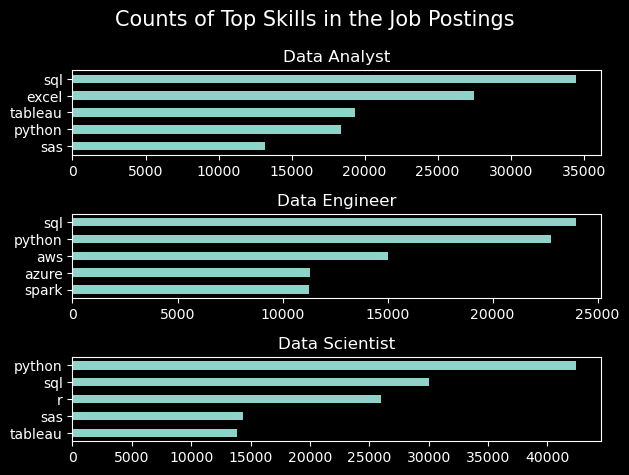

In [11]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title ].head(5)
    df_plot.plot(kind='barh', x= 'job_skills', y= 'skill_count', ax=ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in the Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [12]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name= 'jobs_total')

In [13]:
df_skills_pct = pd.merge(df_skills_count, df_job_title_count, how= 'left', on= 'job_title_short')

In [14]:
df_skills_pct['skills_percentage'] = 100 * (df_skills_pct['skill_count']/df_skills_pct['jobs_total'])

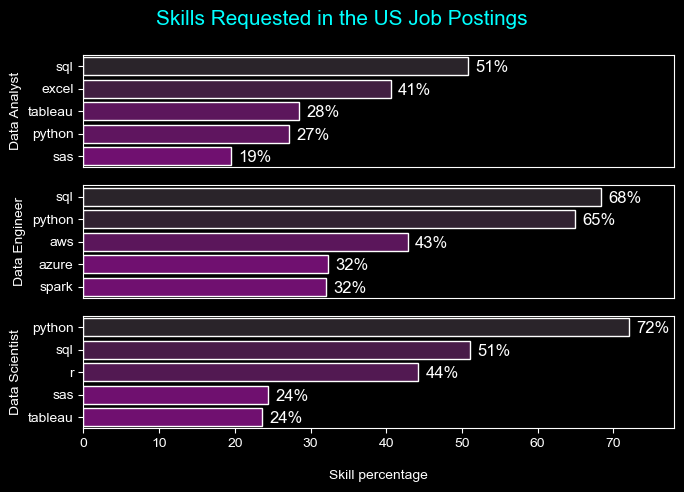

In [15]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(7,5))

sns.set_theme(style='ticks')
plt.style.use('dark_background')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_pct[df_skills_pct['job_title_short'] == job_title ].head(5)
    # df_plot.plot(kind='barh', x= 'job_skills', y= 'skills_percentage', ax=ax[i], title= job_title)
    sns.barplot(data = df_plot,
                x= 'skills_percentage',
                y='job_skills',
                ax=ax[i],
                hue='skill_count', 
                palette='dark:purple_r'
                )
    # ax[i].set_title(job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(job_title)
    ax[i].set_xlim(0, 78)
    for j, v in enumerate(df_plot['skills_percentage']):
        ax[i].text(v + 1, j, f'{v:.0f}%', va='center_baseline')
    
    if i != len(job_titles) -1:
        ax[i].set_xticks([])
        


   
plt.xlabel('\nSkill percentage', fontsize = 10)
fig.suptitle('Skills Requested in the US Job Postings', fontsize=15, color ='cyan')
plt.tight_layout()
plt.show()